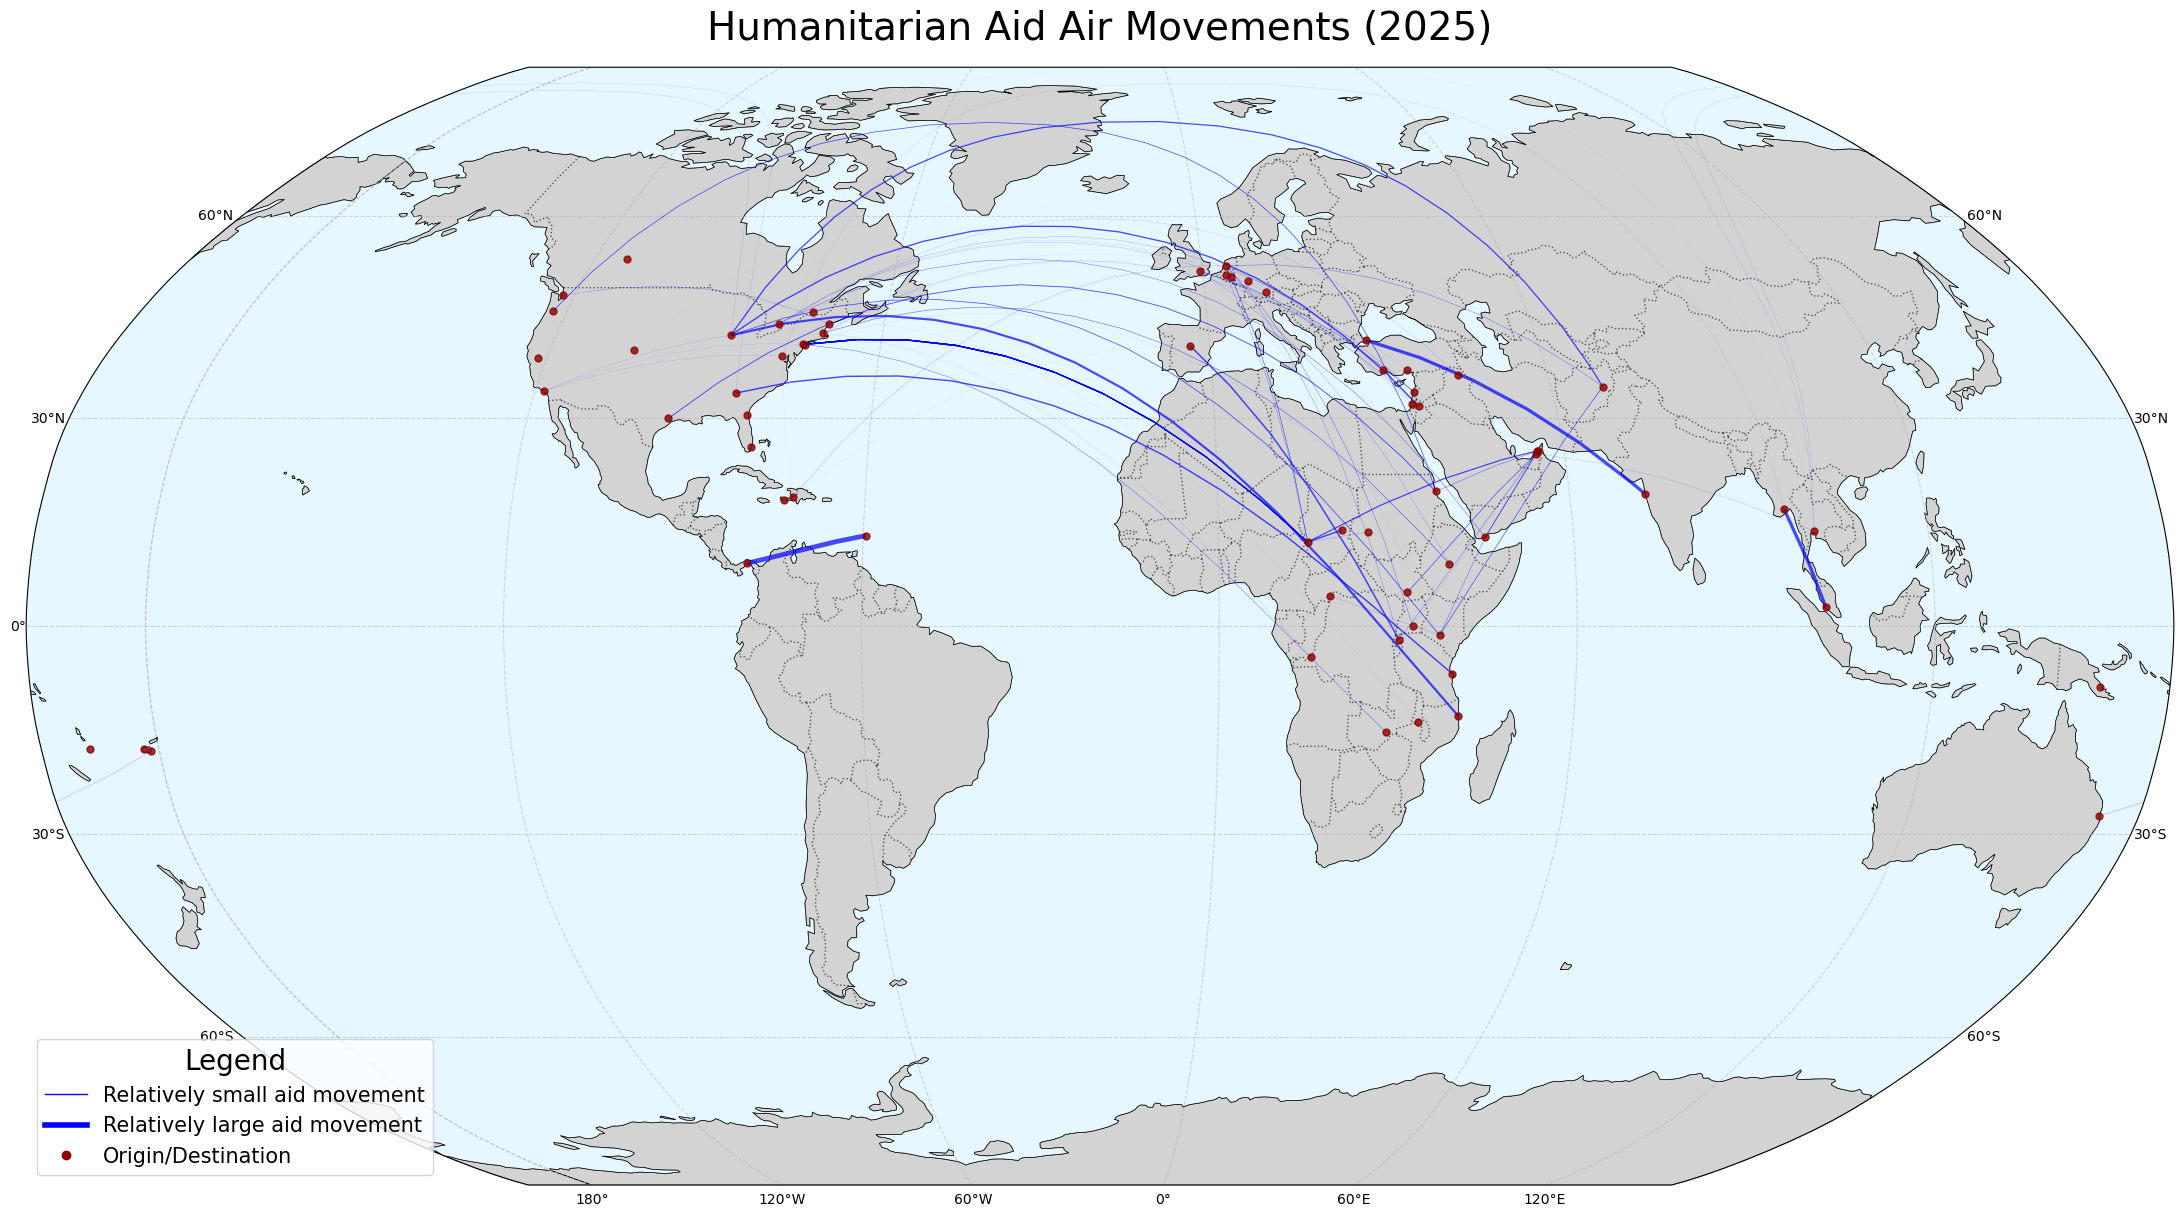

✅ Robinson projection map with all labels and line thickness legend saved to '2023_movements_robinson_all_labels.png'


In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.lines import Line2D

# === Load CSV ===
# csv_path = r"m:\\OneDrive - Umich\\humanitarian-multimodal\\Movement visualization\\2023LatLongAW_with_WKT.csv"
csv_path = r"m:\\OneDrive - Umich\\humanitarian-multimodal\\Movement visualization\\2025Lat_Long_GIS_with_WKT.csv"
df = pd.read_csv(csv_path)

# === Fix WKT and Create GeoDataFrame ===
df['wkt_corrected'] = df.apply(
    lambda row: f"LINESTRING ({row['Origin_longitude']} {row['Origin_latitude']}, "
                f"{row['Destination_longitude']} {row['Destination_latitude']})",
    axis=1
)
gdf = gpd.GeoDataFrame(df, geometry=gpd.GeoSeries.from_wkt(df['wkt_corrected']), crs="EPSG:4326")

# === Combine Origin/Destination Points ===
points_df = pd.DataFrame({
    'Airport': pd.concat([df['Origin'], df['Destination']], ignore_index=True),
    'Longitude': pd.concat([df['Origin_longitude'], df['Destination_longitude']], ignore_index=True),
    'Latitude': pd.concat([df['Origin_latitude'], df['Destination_latitude']], ignore_index=True)
})
points_df = points_df.drop_duplicates(subset=['Longitude', 'Latitude'])

# === Create Figure (Robinson projection centered at 20°W) ===
fig = plt.figure(figsize=(22, 12))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=-20))

# === Base Map ===
ax.add_feature(cfeature.LAND, facecolor='lightgray', edgecolor='black', linewidth=0.5)
ax.add_feature(cfeature.OCEAN, facecolor='#e6f7ff')
ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linestyle=':', alpha=0.6)

# === Gridlines ===
gl = ax.gridlines(draw_labels=True, linestyle='--', alpha=0.5)
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 10}
gl.ylabel_style = {'size': 10}

# === Global extent ===
ax.set_global()

# === Plot routes (great-circle arcs) ===
try:
    linewidths = gdf['AW'] / 20000
except:
    linewidths = gdf['AW (kg)'] / 20000

gdf.plot(ax=ax, transform=ccrs.Geodetic(), color='blue', linewidth=linewidths, alpha=0.7, zorder=3)

# === Plot airport points ===
ax.scatter(
    points_df['Longitude'], points_df['Latitude'],
    color='darkred', s=25, transform=ccrs.PlateCarree(),
    label='Origin/Destination', alpha=0.8, zorder=5
)

# === Add labels ===
# for _, row in points_df.iterrows():
#     ax.text(
#         row['Longitude'], row['Latitude'],
#         str(row['Airport']), 
#         transform=ccrs.PlateCarree(),
#         fontsize=9, color='darkred', ha='center', va='bottom', zorder=6
#     )

# === Custom Legend for Line Thickness ===
legend_lines = [
    Line2D([0], [0], color='blue', lw=1, label='Relatively small aid movement'),
    Line2D([0], [0], color='blue', lw=4, label='Relatively large aid movement'),
    Line2D([0], [0], color='darkred', marker='o', linestyle='None', markersize=6, label='Origin/Destination')
]
ax.legend(handles=legend_lines, loc='lower left', title="Legend", frameon=True, fontsize=15, title_fontsize=20)

# === Title and Save ===
ax.set_title('Humanitarian Aid Air Movements (2025)', fontsize=28, pad=20)
plt.tight_layout()
# plt.savefig("2023_movements_robinson_all_labels.png", dpi=300, bbox_inches='tight')
plt.show()

print("✅ Robinson projection map with all labels and line thickness legend saved to '2023_movements_robinson_all_labels.png'")


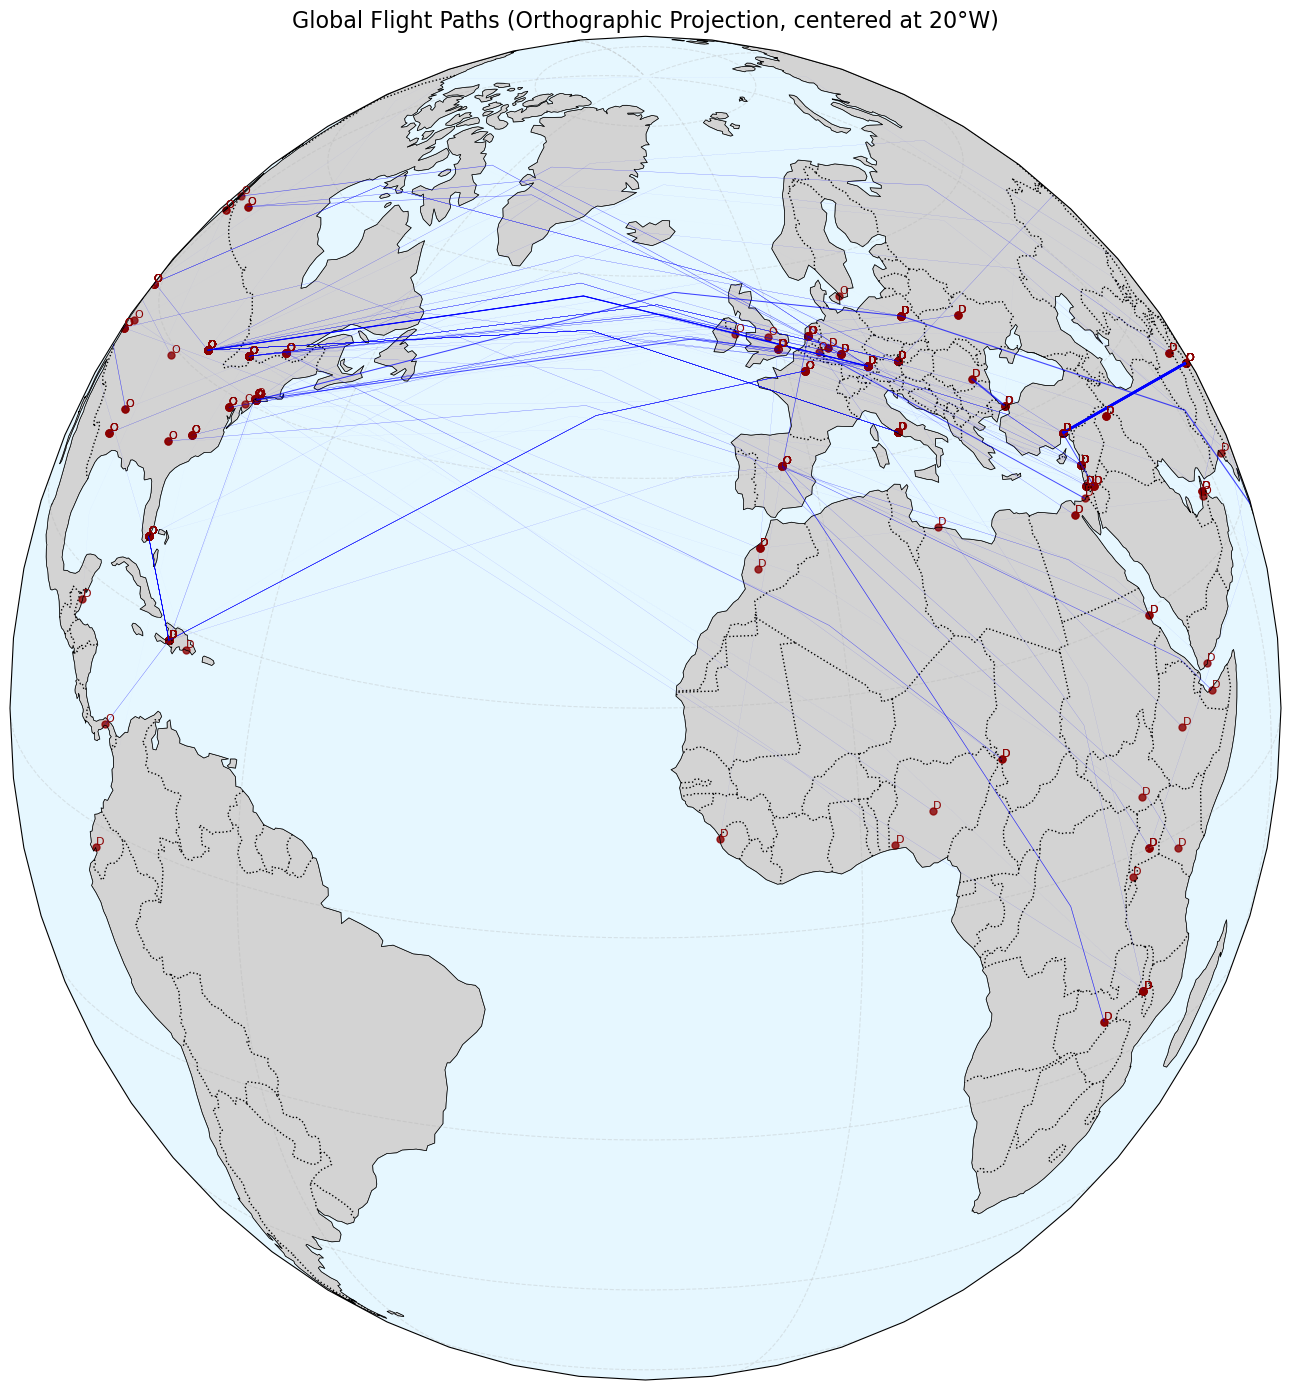

✅ Orthographic globe with city labels saved to 'flight_paths_orthographic.png'


In [21]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# === Load CSV ===
csv_path = r"m:\OneDrive - Umich\humanitarian-multimodal\Movement visualization\2023LatLongAW_with_WKT.csv"
df = pd.read_csv(csv_path)

# === Fix WKT and Create GeoDataFrame ===
df['wkt_corrected'] = df.apply(
    lambda row: f"LINESTRING ({row['Origin_longitude']} {row['Origin_latitude']}, "
                f"{row['Destination_longitude']} {row['Destination_latitude']})",
    axis=1
)
gdf = gpd.GeoDataFrame(df, geometry=gpd.GeoSeries.from_wkt(df['wkt_corrected']), crs="EPSG:4326")

# === Set up an Orthographic projection (globe view) ===
# You can change the center to highlight different parts of the world
central_lon = -20   # center around 20° W
central_lat = 20    # roughly over North Africa / Atlantic
projection = ccrs.Orthographic(central_longitude=central_lon, central_latitude=central_lat)

# === Create the Figure ===
fig = plt.figure(figsize=(14, 14))
ax = fig.add_subplot(1, 1, 1, projection=projection)

# === Add Base Map Features ===
ax.add_feature(cfeature.LAND, facecolor='lightgray', edgecolor='black', linewidth=0.5)
ax.add_feature(cfeature.OCEAN, facecolor='#e6f7ff')
ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linestyle=':')

# === Add Gridlines ===
gl = ax.gridlines(draw_labels=False, linestyle='--', alpha=0.3)

# === Plot Great-Circle Arcs ===
linewidths = gdf['AW'] / 50000
gdf.plot(ax=ax, transform=ccrs.Geodetic(), color='blue', linewidth=linewidths, alpha=0.7)

# === Plot All Points ===
ax.scatter(
    df[['Origin_longitude', 'Destination_longitude']].values.flatten(),
    df[['Origin_latitude', 'Destination_latitude']].values.flatten(),
    color='darkred', s=25, transform=ccrs.PlateCarree(), alpha=0.8,
)

# === Add City Labels (avoid clutter by offsetting text slightly) ===
for _, row in df.iterrows():
    # Origin label
    ax.text(
        row['Origin_longitude'], row['Origin_latitude'], str(row.get('Origin_city', 'O')),
        transform=ccrs.PlateCarree(),
        fontsize=8, color='darkred', ha='left', va='bottom'
    )
    # Destination label
    ax.text(
        row['Destination_longitude'], row['Destination_latitude'], str(row.get('Destination_city', 'D')),
        transform=ccrs.PlateCarree(),
        fontsize=8, color='darkred', ha='left', va='bottom'
    )

# === Final Touches ===
ax.set_global()
ax.set_title(f"Global Flight Paths (Orthographic Projection, centered at {abs(central_lon)}°{'W' if central_lon < 0 else 'E'})", fontsize=16)
plt.tight_layout()
plt.savefig("flight_paths_orthographic.png", dpi=300, bbox_inches='tight')
plt.show()

print("✅ Orthographic globe with city labels saved to 'flight_paths_orthographic.png'")


In [3]:
gdf

,Origin,Destination,Origin_latitude,Origin_longitude,Destination_latitude,Destination_longitude,AW,wkt,wkt_corrected,geometry
0,JFK,DAC,40.639801,-73.778900,23.843347,90.397783,273.0000,"LINESTRING (-73.77890015 40.63980103, 90.39778...","LINESTRING (-73.77890015 40.63980103, 90.39778...","LINESTRING (-73.7789 40.6398, 90.39778 23.84335)"
1,MIA,PAP,25.793200,-80.290604,18.580000,-72.292503,1157.0000,LINESTRING (-80.2906036376953 25.7931995391845...,LINESTRING (-80.2906036376953 25.7931995391845...,"LINESTRING (-80.2906 25.7932, -72.2925 18.58)"
2,JFK,DAC,40.639801,-73.778900,23.843347,90.397783,851.0000,"LINESTRING (-73.77890015 40.63980103, 90.39778...","LINESTRING (-73.77890015 40.63980103, 90.39778...","LINESTRING (-73.7789 40.6398, 90.39778 23.84335)"
3,JFK,DAC,40.639801,-73.778900,23.843347,90.397783,528.0000,"LINESTRING (-73.77890015 40.63980103, 90.39778...","LINESTRING (-73.77890015 40.63980103, 90.39778...","LINESTRING (-73.7789 40.6398, 90.39778 23.84335)"
4,SFO,MUC,37.618999,-122.375000,48.353802,11.786100,1458.8000,"LINESTRING (-122.375 37.6189994812011, 11.7861...","LINESTRING (-122.375 37.6189994812011, 11.7861...","LINESTRING (-122.375 37.619, 11.7861 48.3538)"
...,...,...,...,...,...,...,...,...,...,...
279,MIA,PAP,25.793200,-80.290604,18.580000,-72.292503,819.6414,LINESTRING (-80.2906036376953 25.7931995391845...,LINESTRING (-80.2906036376953 25.7931995391845...,"LINESTRING (-80.2906 25.7932, -72.2925 18.58)"
280,MIA,PAP,25.793200,-80.290604,18.580000,-72.292503,2220.0000,LINESTRING (-80.2906036376953 25.7931995391845...,LINESTRING (-80.2906036376953 25.7931995391845...,"LINESTRING (-80.2906 25.7932, -72.2925 18.58)"
281,MIA,PAP,25.793200,-80.290604,18.580000,-72.292503,1061.0000,LINESTRING (-80.2906036376953 25.7931995391845...,LINESTRING (-80.2906036376953 25.7931995391845...,"LINESTRING (-80.2906 25.7932, -72.2925 18.58)"
282,MIA,PAP,25.793200,-80.290604,18.580000,-72.292503,715.0000,LINESTRING (-80.2906036376953 25.7931995391845...,LINESTRING (-80.2906036376953 25.7931995391845...,"LINESTRING (-80.2906 25.7932, -72.2925 18.58)"
